In [1]:
import scanpy as sc 
import pandas as pd
import SEACells
import numpy as np
import matplotlib
from statistics import mode
import matplotlib.pyplot as plt
from statistics import mode
import sys 
sys.path.insert(0, '../')
import utils
from importlib import reload
reload(utils)
from utils import *
import seaborn as sns
# Some plotting aesthetics
%matplotlib inline
sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100


data_path = "/ibex/user/alsulara/PrePR-CT/Data/"
save_path_results = "/ibex/user/alsulara/PrePR-CT/Results/"

In [2]:
adata = sc.read(data_path+"McFarlandTsherniak2020.h5ad")
adata.obs.rename({"cell_line": "cell_type"}, axis=1, inplace=True)
adata.obs.rename({"perturbation": "condition"}, axis=1, inplace=True)
print(adata.obs.perturbation_type.value_counts())
adata_gen = adata[(adata.obs.perturbation_type != 'drug') , :].copy()
print(adata_gen)
adata = adata[(adata.obs.perturbation_type == 'drug') , :].copy()
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
adata.var['ribo'] = adata.var_names.str.startswith(("RPS","RPL"))
adata = adata[:, adata.var[(adata.var.mt == False) & (adata.var.ribo == False)].index.values]
adata

perturbation_type
drug      154710
CRISPR     28165
Name: count, dtype: int64
AnnData object with n_obs × n_vars = 28165 × 32738
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_type', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'condition', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID'
    var: 'ensembl_id', 'ncounts', 'ncells'


View of AnnData object with n_obs × n_vars = 154710 × 32619
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_type', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'condition', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID'
    var: 'ensembl_id', 'ncounts', 'ncells', 'mt', 'ribo'

In [3]:
cross_tab = pd.crosstab(adata.obs['dose_value'], adata.obs['condition'])
display(cross_tab)
print(adata_gen.obs.perturbation_type.value_counts())
print(len(adata_gen.obs.cell_type.unique()))

condition,AZD5591,Afatinib,BRD3379,Bortezomib,Dabrafenib,Everolimus,Gemcitabine,Idasanutlin,JQ1,Navitoclax,Prexasertib,Taselisib,Trametinib,control
dose_value,,,,,,,,,,,,,,
0.0,7098,0,21206,0,0,0,0,0,0,0,0,0,0,29143
0.1,0,0,0,0,12814,0,2093,0,0,0,0,0,41300,0
0.5,0,3807,0,0,0,0,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,0,0,0,0,3972,3098,0,0
2.5,0,0,0,5150,0,0,0,5990,5591,0,0,0,0,0
5.0,0,0,0,0,0,0,0,0,0,9623,0,0,0,0
10.0,0,0,0,0,0,3825,0,0,0,0,0,0,0,0


perturbation_type
CRISPR    28165
Name: count, dtype: int64
49


In [4]:
value_counts_cells = adata.obs.cell_type.value_counts()
value_counts_cells = value_counts_cells.head(5).index
adata.obs.cell_type.value_counts()
adata = adata[adata.obs.cell_type.isin(value_counts_cells)].copy()
adata

AnnData object with n_obs × n_vars = 17917 × 32619
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_type', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'condition', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID'
    var: 'ensembl_id', 'ncounts', 'ncells', 'mt', 'ribo'

In [5]:
adata.obs.cell_type.value_counts()

cell_type
COLO680N         4625
RCC10RGB         3862
BICR31           3279
TEN              3172
LNCAPCLONEFGC    2979
Name: count, dtype: int64

In [6]:
adata.var.reset_index(inplace = True)
adata.var
adata.var.rename({"index": "gene_name"}, axis=1, inplace=True)
adata.var.set_index("gene_name", inplace = True)

In [7]:
# basic qc and pp
adata.layers['counts'] = adata.X.copy()

# remove cells that have less than 1000 counts
sc.pp.filter_cells(adata, min_counts=1000, inplace =True)

# remove genes that are detected in less than 50 cells
sc.pp.filter_genes(adata, min_cells=50, inplace =True)

In [8]:
from sklearn import preprocessing
adata.obs['drug_dose_name'] = adata.obs.condition.astype(str) + '_' + adata.obs.dose_value.astype(str)
adata.obs['cov_drug_dose_name'] = adata.obs.cell_type.astype(str) + '_' + adata.obs.drug_dose_name.astype(str)
adata.obs['cov_drug'] = adata.obs.cell_type.astype(str) + '_' + adata.obs.condition.astype(str)
label_encoder = preprocessing.LabelEncoder()
adata.obs["condition_label"] = label_encoder.fit_transform(adata.obs["condition"])
num_perts = adata.obs["condition_label"].max()+1
print(adata.obs["condition"].unique())
print(adata.obs["condition_label"].unique())

['Navitoclax', 'BRD3379', 'AZD5591', 'Taselisib', 'Everolimus', ..., 'Afatinib', 'Dabrafenib', 'Gemcitabine', 'JQ1', 'Prexasertib']
Length: 14
Categories (14, object): ['AZD5591', 'Afatinib', 'BRD3379', 'Bortezomib', ..., 'Prexasertib', 'Taselisib', 'Trametinib', 'control']
[ 9  2  0 11  5  7  3 13 12  1  4  6  8 10]


In [9]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)


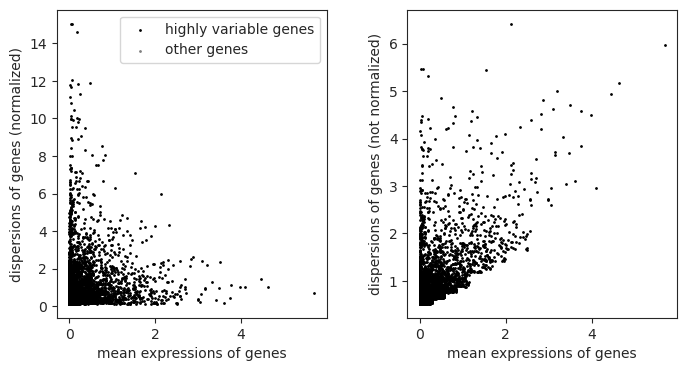

In [10]:
sc.pp.highly_variable_genes(adata, subset=True, n_top_genes = 5000)
sc.pl.highly_variable_genes(adata)

In [11]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

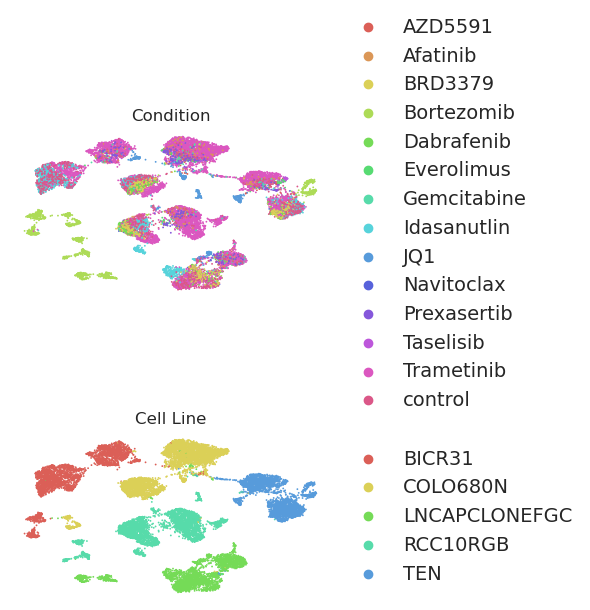

In [13]:
fig, axes = plt.subplots(nrows=2, figsize=(6, 6))  # Adjust figsize as needed
# Plot UMAP 1 in the first subplot if it's not empty
sc.pl.umap(adata=adata, color=["condition"],legend_fontsize=14,ax = axes[0],
           title = "Condition",
           show=False, palette = sns.color_palette("hls", num_perts),
           frameon=False)

sc.pl.umap(adata=adata, color=["cell_type"],legend_fontsize=14,ax = axes[1],
           title = "Cell Line",
           show=False, palette = sns.color_palette("hls", 7),
           frameon=False)

# Adjust spacing between subplots
plt.tight_layout()

# Show the merged plot
plt.savefig('UMAP_McFarland.pdf', bbox_inches='tight')
plt.show()

In [13]:
ctrl_data = adata[adata.obs.condition == 'control'].copy()
ctrl_data

AnnData object with n_obs × n_vars = 2917 × 5000
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_type', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'condition', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID', 'n_counts', 'drug_dose_name', 'cov_drug_dose_name', 'cov_drug', 'condition_label'
    var: 'ensembl_id', 'ncounts', 'ncells', 'mt', 'ribo', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'condition_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [14]:
n_SEACells = int(len(ctrl_data) / 50)
build_kernel_on = 'X_pca' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells
n_SEACells

58

In [15]:
model = SEACells.core.SEACells(ctrl_data, 
                  build_kernel_on=build_kernel_on, 
                  n_SEACells=n_SEACells, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)

Welcome to SEACells!


In [16]:
model.construct_kernel_matrix()
M = model.kernel_matrix

Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/2917 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/2917 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/2917 [00:00<?, ?it/s]

Constructing CSR matrix...


In [17]:
model.initialize_archetypes()

Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Done.
Sampling waypoints ...
Done.
Selecting 49 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████| 19/19 [00:00<00:00, 329.37it/s]

Selecting 9 cells from greedy initialization.


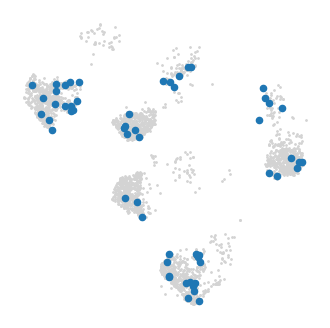

In [18]:
SEACells.plot.plot_initialization(ctrl_data, model)

In [19]:
model.fit(min_iter=10, max_iter=100)

Randomly initialized A matrix.
Setting convergence threshold at 0.00093
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Converged after 25 iterations.


In [20]:
# You can force the model to run additional iterations step-wise using the .step() function
print(f'Ran for {len(model.RSS_iters)} iterations')
for _ in range(5):
    model.step()
print(f'Ran for {len(model.RSS_iters)} iterations')

Ran for 26 iterations
Ran for 31 iterations


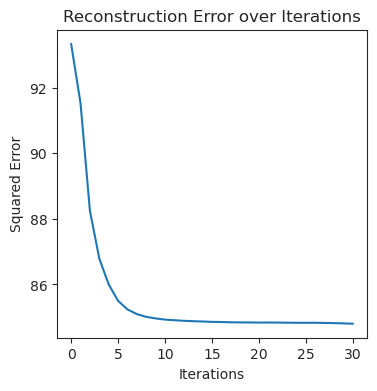

In [21]:
model.plot_convergence()

In [22]:
adata.obs['SEACell'] = 'None'
adata.obs.loc[ctrl_data.obs.index.tolist(), 'SEACell'] = ctrl_data.obs['SEACell'].values

In [23]:
SEACell_soft_ad = SEACells.core.summarize_by_soft_SEACell(ctrl_data,  model.A_, 
                                                          celltype_label='cell_type', summarize_layer = 'counts', minimum_weight = 0.05)
SEACell_soft_ad.X.A

100%|██████████| 58/58 [00:08<00:00,  7.04it/s]


array([[0.00846094, 0.02100912, 0.        , ..., 0.07357347, 0.02652438,
        0.03627515],
       [0.03605919, 0.003448  , 0.        , ..., 0.18593686, 0.07663805,
        0.        ],
       [0.01453294, 0.0139861 , 0.0610911 , ..., 0.31498033, 0.03443116,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.25691576, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.14311536, 0.        ,
        0.        ],
       [0.00082189, 0.00101302, 0.        , ..., 0.02772457, 0.01859772,
        0.01438508]])

In [24]:
SEACell_soft_ad.obs.rename({"celltype": "cell_type"}, axis=1, inplace=True)
SEACell_soft_ad.obs.cell_type.value_counts()

cell_type
BICR31           17
LNCAPCLONEFGC    14
COLO680N         12
TEN               9
RCC10RGB          6
Name: count, dtype: int64

In [25]:
SEACell_soft_ad.write(data_path+'SEACell_soft_ad_McFarland.h5ad')
adata.write(data_path+'McFarland.h5ad')
adata

AnnData object with n_obs × n_vars = 17476 × 5000
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_type', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'condition', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID', 'n_counts', 'drug_dose_name', 'cov_drug_dose_name', 'cov_drug', 'condition_label', 'SEACell'
    var: 'ensembl_id', 'ncounts', 'ncells', 'mt', 'ribo', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'condition_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [30]:
SEACell_soft_ad = sc.read(data_path+'SEACell_soft_ad_McFarland.h5ad')
SEACell_soft_ad

AnnData object with n_obs × n_vars = 58 × 5000
    obs: 'Pseudo-sizes', 'cell_type', 'celltype_purity'

In [31]:
import os
import networkx as nx
from torch_geometric.utils.convert import from_networkx
from sklearn.metrics import mean_squared_error
from torch_geometric.data import InMemoryDataset, Data, download_url, extract_zip, HeteroData, Batch
from torch_geometric.utils import *
import torch
from torch import nn
cell_type_network = {}
# Leaf directory 
directory = "McFarland"
# Parent Directories 
parent_dir = "/ibex/user/alsulara/PrePR-CT/graphs/"
# Path 
path = os.path.join(parent_dir, directory)
print(path)
try: 
    os.makedirs(path) 
except:
    print("File exists!")
max_nodes = 0
genes_pos = []
for cell_type in SEACell_soft_ad.obs.cell_type.unique():
    print(cell_type)
    cell = Correlation_matrix(SEACell_soft_ad, cell_type, 'cell_type',
                       hv_genes_cells = None, union_HVGs = True)
    threshold = np.percentile(np.abs(cell[0].values), 99.0)
    print("threshold:", threshold)
    
    g = create_coexpression_graph(SEACell_soft_ad, cell, cell_type, threshold, 'gene_name')
    if g.num_nodes >= max_nodes:
        max_nodes = g.num_nodes
    cell_type_network[cell_type] = g
    genes_pos.append(cell_type_network[cell_type].pos)
    cell_type_network[cell_type].pos = torch.tensor(cell_type_network[cell_type].pos)
    torch.save(cell_type_network[cell_type] , os.path.join(path,cell_type+'_coexpr_graph_temp.pkl'))

cell_type_network    

/ibex/scratch/alsulara/PrePR-CT/graphs/McFarland
File exists!
COLO680N


/home/alsulara/miniconda3/envs/Perturbation_Project/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alsulara/miniconda3/envs/Perturbation_Project/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


threshold: 0.8707376475467116
number_of_edges before the threshold (5000 x 5000):  25000000
number_of_edges after the threshold:  250001
number_of_edges after removing self loops:  245264
final number_of_edges:  245264
TEN


/home/alsulara/miniconda3/envs/Perturbation_Project/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alsulara/miniconda3/envs/Perturbation_Project/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


threshold: 0.9668804049456502
number_of_edges before the threshold (5000 x 5000):  25000000
number_of_edges after the threshold:  250000
number_of_edges after removing self loops:  245358
final number_of_edges:  245358
LNCAPCLONEFGC


/home/alsulara/miniconda3/envs/Perturbation_Project/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alsulara/miniconda3/envs/Perturbation_Project/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


threshold: 0.9601845284660389
number_of_edges before the threshold (5000 x 5000):  25000000
number_of_edges after the threshold:  250001
number_of_edges after removing self loops:  245186
final number_of_edges:  245186
RCC10RGB


/home/alsulara/miniconda3/envs/Perturbation_Project/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alsulara/miniconda3/envs/Perturbation_Project/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


threshold: 0.9585500447655997
number_of_edges before the threshold (5000 x 5000):  25000000
number_of_edges after the threshold:  250001
number_of_edges after removing self loops:  245454
final number_of_edges:  245454
BICR31


/home/alsulara/miniconda3/envs/Perturbation_Project/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/alsulara/miniconda3/envs/Perturbation_Project/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


threshold: 0.7791046124807542
number_of_edges before the threshold (5000 x 5000):  25000000
number_of_edges after the threshold:  250000
number_of_edges after removing self loops:  245302
final number_of_edges:  245302


{'COLO680N': Data(x=[4443, 12], edge_index=[2, 245264], edge_attr=[245264], pos=[4443]),
 'TEN': Data(x=[3186, 9], edge_index=[2, 245358], edge_attr=[245358], pos=[3186]),
 'LNCAPCLONEFGC': Data(x=[2131, 14], edge_index=[2, 245186], edge_attr=[245186], pos=[2131]),
 'RCC10RGB': Data(x=[4525, 6], edge_index=[2, 245454], edge_attr=[245454], pos=[4525]),
 'BICR31': Data(x=[4407, 17], edge_index=[2, 245302], edge_attr=[245302], pos=[4407])}

In [32]:
overlap_df = pd.DataFrame(index = cell_type_network.keys(), columns = cell_type_network.keys())
for key1 in cell_type_network.keys():
    for key2 in cell_type_network.keys():
        overlap_df.loc[key1, key2] = (len(np.intersect1d(cell_type_network[key1].pos, cell_type_network[key2].pos)))

# identify the furthest cell type
indices = np.argsort(overlap_df.values, axis=0)[-5, :]
print(indices)
testing_cell = overlap_df.columns[mode(indices)]
print(testing_cell)
overlap_df

[2 2 1 2 2]
LNCAPCLONEFGC


,COLO680N,TEN,LNCAPCLONEFGC,RCC10RGB,BICR31
COLO680N,4443,2920,1941,4095,3970
TEN,2920,3186,1537,2949,2890
LNCAPCLONEFGC,1941,1537,2131,1971,1946
RCC10RGB,4095,2949,1971,4525,4079
BICR31,3970,2890,1946,4079,4407


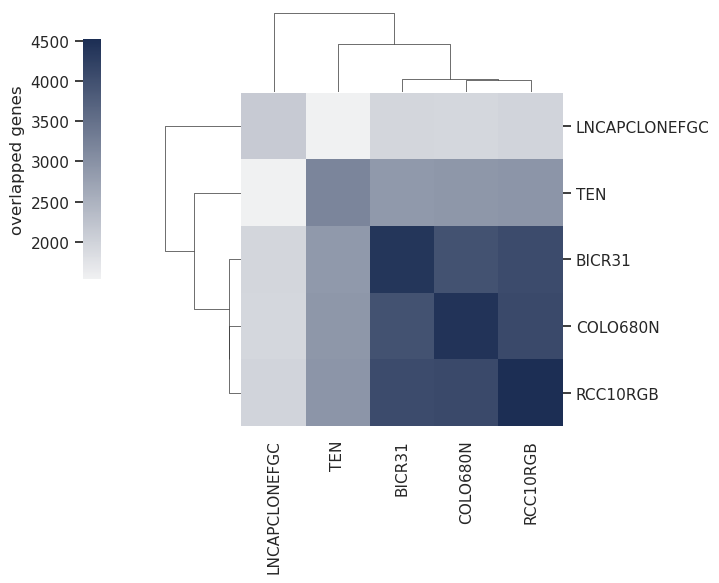

In [33]:
sns.set()
cmap = sns.light_palette("#1C2E54", as_cmap=True, n_colors = 5)
sns.set_style( {'axes.grid' : False})
g = sns.clustermap(overlap_df.astype(int), figsize=(6, 6), cmap = cmap
                   , cbar_kws={'label': 'overlapped genes', 'location': 'left'})
g.fig.subplots_adjust(right=0.7)
g.ax_cbar.set_position((-0.1, .52, .03, .4))
plt.savefig(save_path_results+'overlap_matrix_McFarland.pdf', bbox_inches='tight')
plt.show()
sns.set()